In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install git+https://github.com/wwrechard/pydlm.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/wwrechard/pydlm.git to /tmp/pip-req-build-la0kvv_j
  Running command git clone --filter=blob:none --quiet https://github.com/wwrechard/pydlm.git /tmp/pip-req-build-la0kvv_j
  Resolved https://github.com/wwrechard/pydlm.git to commit 1b1d8f769bad9cfcc8022fd2f4f6d30fb7bbc7e8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
# 2. Đọc dữ liệu từ file CSV
df = pd.read_csv('ETH-USD.csv')
df1=df.reset_index()['Close'].values

In [ ]:
# 3. Chia train test
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = np.array(df1[:train_size])
test_data = np.array(df1[train_size:train_size+test_size])
val_data = np.array(df1[train_size+test_size:])

In [ ]:
from pydlm import dlm, autoReg, dynamic
model = dlm(train_data)
autoreg_model = autoReg(degree=5, discount=0.9)
model = model + autoreg_model

In [ ]:
dynamic_model = dynamic(features=[[x] for x in train_data], discount=1)
model += dynamic_model

In [ ]:
model.fit()


INFO:pydlm:Initializing models...
INFO:pydlm:Initialization finished.
INFO:pydlm:Starting forward filtering...
INFO:pydlm:Forward filtering completed.
INFO:pydlm:Starting backward smoothing...
INFO:pydlm:Backward smoothing completed.


In [ ]:
# Dự đoán tập test_data, val_data
(test_predict, test_var) = model.predictN(N=test_size, date = 0)
(val_predict, val_var) = model.predictN(N=val_size, date = 0)

# Dự đoán 30 ngày
(fur_predict, fur_var) = model.predictN(N=30, date = 0)

In [ ]:
# 10. Đánh giá độ chính xác thuật toán
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
test_mae = mean_absolute_error(test_predict, test_data)
test_mape = mean_absolute_percentage_error(test_predict, test_data)
test_rmse = np.sqrt(np.mean((test_predict - test_data)**2))
print('Testing MAE:', test_mae)
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)

val_mae = mean_absolute_error(val_predict, val_data)
val_rmse = np.sqrt(np.mean((val_predict - val_data)**2))
val_mape = mean_absolute_percentage_error(val_predict, val_data)
print('Validation MAE:', val_mae)
print('Validation RMSE:', val_rmse)
print('Validation MAPE:', val_mape)

Testing MAE: 2483.310208966486
Testing RMSE: 2673.814883614139
Testing MAPE: 14.106469798207558
Validation MAE: 1325.7962227201645
Validation RMSE: 1357.3674637038243
Validation MAPE: 7.6213757501100305


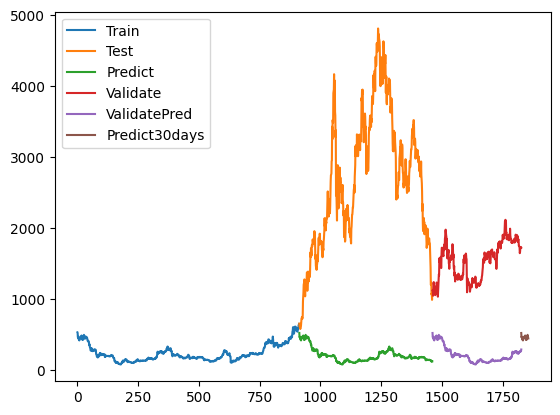

In [ ]:
# .Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(train_data)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(test_data))
test_data_index = pd.RangeIndex(start=train_size+0, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(test_predict))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+0, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,val_predict)
prediect_data_index = pd.RangeIndex(start=train_size+test_size+val_size-1, stop=train_size+test_size+val_size+29, step=1)
plt.plot(prediect_data_index,(fur_predict))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()